This notebook looks at the spatial relations between parks and apartment listings scraped from craigslist. First, I subset the craigslist file to only include those that include parks in their descriptions and convert to a geodataframe. After reading the county parks dataframe, I establish a centroid and project both dataframes to the same projection.  

In [38]:
import pandas as pd 
park = pd.read_pickle("listings_sorted.pkl")
park.head()

,urls,price,description,lat,long,bedrooms,bathrooms,sqft,park_TF,park_T_why,geometry
2,https://losangeles.craigslist.org/wst/apa/d/lo...,2178.0,welcome to casa de vida apartments west la li...,34.028928,-118.415252,0.0,1.0,475.0,True,"[parks nearby, public parks, public park, parks]",POINT (-118.41525 34.02893)
10,https://losangeles.craigslist.org/wst/apa/d/lo...,2250.0,2 bedroom 1 bath available now 2250 per mon...,33.916308,-118.287922,2.0,1.0,775.0,False,[],POINT (-118.28792 33.91631)
14,https://losangeles.craigslist.org/wst/apa/d/lo...,3499.0,featuring lush vegetation a koi pond fountains...,34.066000,-118.474000,1.0,1.0,800.0,False,[],POINT (-118.47400 34.06600)
15,https://losangeles.craigslist.org/wst/apa/d/lo...,2275.0,unit availability july 5 2023 welcome to burto...,34.072109,-118.380919,1.0,1.0,837.0,False,[],POINT (-118.38092 34.07211)
16,https://losangeles.craigslist.org/lac/apa/d/lo...,1775.0,moments away from hollywood boulevard cherokee...,34.102073,-118.335110,0.0,1.0,500.0,False,[],POINT (-118.33511 34.10207)


In [39]:
park.shape

(7583, 11)

In [40]:
parktrue = park[park['park_TF'] == True]

In [41]:
parktrue.shape

(1450, 11)

In [42]:
import geopandas as gpd
parks = gpd.read_file('county_parks.geojson')

In [43]:
parks.to_crs('EPSG:3497', inplace=True)


In [44]:
parks['centroid'] = parks.centroid
parks.head(1)

,OBJECTID,UNIT_ID,LMS_ID,PARK_NAME,PARK_LBL,ACCESS_TYP,RPT_ACRES,GIS_ACRES,AGNCY_NAME,AGNCY_LEV,AGNCY_TYP,AGNCY_WEB,MNG_AGENCY,COGP_TYP,NDS_AN_TYP,NEEDS_ANLZ,TKIT_SUM,AMEN_RPT,PRKINF_CND,AM_OPNSP,AM_TRLS,TRLS_MI,TENIS,BSKTB,BASEB,SOCCR,MPFLD,FITZN,SK8PK,PCNIC,PLGND,POOLS,SPPAD,DGPRK,GYM,COMCT,SNRCT,RSTRM,TOTAL_GOOD,TOTAL_FAIR,TOTAL_POOR,TYPE,CENTER_LAT,CENTER_LON,ADDRESS,CITY,ZIP,HOURS,PHONES,IS_COUNTY,Shape__Area,Shape__Length,geometry,centroid
0,1,30.0,23603.0,El Barrio Park,El Barrio Park,Open Access,2.093,2.092992,"Claremont, City of",City,City Agency,http://www.ci.claremont.ca.us/ps.leisurerecrea...,"Claremont, City of",Pocket Park,Park < 5 Acres,Yes,Yes,Yes,Fair,Present - Fair,None,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,Local Park,34.097081,-117.704423,400 Claremont Blvd,Claremont,91711,NaN,NaN,No,91170.362305,1451.547906,"POLYGON ((2027330.308 566315.335, 2027294.750 ...",POINT (2027274.179 566272.313)


In [45]:
parks.shape

(3012, 54)

In [46]:
parktrue = gpd.GeoDataFrame(parktrue, geometry=gpd.points_from_xy(parktrue.long, parktrue.lat), crs="EPSG:4326")
parktrue.head(1)

,urls,price,description,lat,long,bedrooms,bathrooms,sqft,park_TF,park_T_why,geometry
2,https://losangeles.craigslist.org/wst/apa/d/lo...,2178.0,welcome to casa de vida apartments west la li...,34.028928,-118.415252,0.0,1.0,475.0,True,"[parks nearby, public parks, public park, parks]",POINT (-118.41525 34.02893)


In [47]:
parks.to_crs('EPSG:3497', inplace=True)
parktrue.to_crs('EPSG:3497', inplace=True)

In [48]:
parks.head(1)

,OBJECTID,UNIT_ID,LMS_ID,PARK_NAME,PARK_LBL,ACCESS_TYP,RPT_ACRES,GIS_ACRES,AGNCY_NAME,AGNCY_LEV,AGNCY_TYP,AGNCY_WEB,MNG_AGENCY,COGP_TYP,NDS_AN_TYP,NEEDS_ANLZ,TKIT_SUM,AMEN_RPT,PRKINF_CND,AM_OPNSP,AM_TRLS,TRLS_MI,TENIS,BSKTB,BASEB,SOCCR,MPFLD,FITZN,SK8PK,PCNIC,PLGND,POOLS,SPPAD,DGPRK,GYM,COMCT,SNRCT,RSTRM,TOTAL_GOOD,TOTAL_FAIR,TOTAL_POOR,TYPE,CENTER_LAT,CENTER_LON,ADDRESS,CITY,ZIP,HOURS,PHONES,IS_COUNTY,Shape__Area,Shape__Length,geometry,centroid
0,1,30.0,23603.0,El Barrio Park,El Barrio Park,Open Access,2.093,2.092992,"Claremont, City of",City,City Agency,http://www.ci.claremont.ca.us/ps.leisurerecrea...,"Claremont, City of",Pocket Park,Park < 5 Acres,Yes,Yes,Yes,Fair,Present - Fair,None,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,Local Park,34.097081,-117.704423,400 Claremont Blvd,Claremont,91711,NaN,NaN,No,91170.362305,1451.547906,"POLYGON ((2027330.308 566315.335, 2027294.750 ...",POINT (2027274.179 566272.313)


In [49]:
parks = parks[['OBJECTID', 'PARK_NAME', 'RPT_ACRES', 'ADDRESS', 'CITY', 
              'ZIP', 'Shape__Area', 'Shape__Length', 'geometry', 'centroid']]
parks.head(1)

,OBJECTID,PARK_NAME,RPT_ACRES,ADDRESS,CITY,ZIP,Shape__Area,Shape__Length,geometry,centroid
0,1,El Barrio Park,2.093,400 Claremont Blvd,Claremont,91711,91170.362305,1451.547906,"POLYGON ((2027330.308 566315.335, 2027294.750 ...",POINT (2027274.179 566272.313)


After subsetting the datasets, I conduct a spatial join and establish a distance column, checking the joined dataframe shape to make sure that listings were preserved.


In [50]:
join = parktrue.sjoin_nearest(parks, distance_col='distance')
join.shape

(1477, 22)

In [116]:
join.head(10)

,urls,price,description,lat,long,bedrooms,bathrooms,sqft,park_TF,park_T_why,geometry,index_right,OBJECTID,PARK_NAME,RPT_ACRES,ADDRESS,CITY,ZIP,Shape__Area,Shape__Length,centroid,distance,line
2,https://losangeles.craigslist.org/wst/apa/d/lo...,2178.0,welcome to casa de vida apartments west la li...,34.028928,-118.415252,0.0,1.0,475.0,True,"[parks nearby, public parks, public park, parks]",POINT (1961650.114 558751.186),274,275,Palms Park (City of Los Angeles),2.703,2950 Overland Ave,Los Angeles,90064,117732.124023,2484.284534,POINT (1961480.614 559268.459),462.655676,"LINESTRING (1961650.114 558751.186, 1961480.61..."
215,https://losangeles.craigslist.org/wst/apa/d/lo...,2178.0,500 off when you sign a 12 month lease casa de...,34.028928,-118.415252,0.0,1.0,475.0,True,"[parks nearby, public parks, public park, parks]",POINT (1961650.114 558751.186),274,275,Palms Park (City of Los Angeles),2.703,2950 Overland Ave,Los Angeles,90064,117732.124023,2484.284534,POINT (1961480.614 559268.459),462.655676,"LINESTRING (1961650.114 558751.186, 1961480.61..."
293,https://losangeles.craigslist.org/wst/apa/7630...,2875.0,casa de vida unit availability june 19 2023 ap...,34.028928,-118.415252,2.0,2.0,1010.0,True,"[parks nearby, public parks, public park, parks]",POINT (1961650.114 558751.186),274,275,Palms Park (City of Los Angeles),2.703,2950 Overland Ave,Los Angeles,90064,117732.124023,2484.284534,POINT (1961480.614 559268.459),462.655676,"LINESTRING (1961650.114 558751.186, 1961480.61..."
529,https://losangeles.craigslist.org/wst/apa/d/lo...,2178.0,500 off when you sign a 12 month lease casa de...,34.028928,-118.415252,0.0,1.0,475.0,True,"[parks nearby, public parks, public park, parks]",POINT (1961650.114 558751.186),274,275,Palms Park (City of Los Angeles),2.703,2950 Overland Ave,Los Angeles,90064,117732.124023,2484.284534,POINT (1961480.614 559268.459),462.655676,"LINESTRING (1961650.114 558751.186, 1961480.61..."
1089,https://losangeles.craigslist.org/wst/apa/d/lo...,2178.0,500 off when you sign a 12 month lease casa de...,34.028928,-118.415252,0.0,1.0,475.0,True,"[parks nearby, public parks, public park, parks]",POINT (1961650.114 558751.186),274,275,Palms Park (City of Los Angeles),2.703,2950 Overland Ave,Los Angeles,90064,117732.124023,2484.284534,POINT (1961480.614 559268.459),462.655676,"LINESTRING (1961650.114 558751.186, 1961480.61..."
1528,https://losangeles.craigslist.org/wst/apa/d/lo...,2178.0,casa de vida 500 off when you sign a 12 month ...,34.028928,-118.415252,0.0,1.0,475.0,True,"[parks nearby, public parks, public park, parks]",POINT (1961650.114 558751.186),274,275,Palms Park (City of Los Angeles),2.703,2950 Overland Ave,Los Angeles,90064,117732.124023,2484.284534,POINT (1961480.614 559268.459),462.655676,"LINESTRING (1961650.114 558751.186, 1961480.61..."
1544,https://losangeles.craigslist.org/wst/apa/d/lo...,2395.0,unit availability june 30 2023 discover your n...,34.029777,-118.415267,1.0,1.0,660.0,True,[recreation center],POINT (1961649.118 558845.365),274,275,Palms Park (City of Los Angeles),2.703,2950 Overland Ave,Los Angeles,90064,117732.124023,2484.284534,POINT (1961480.614 559268.459),380.376555,"LINESTRING (1961649.118 558845.365, 1961480.61..."
1784,https://losangeles.craigslist.org/wst/apa/d/lo...,2395.0,unit availability june 30 2023 discover your n...,34.029777,-118.415267,1.0,1.0,660.0,True,[recreation center],POINT (1961649.118 558845.365),274,275,Palms Park (City of Los Angeles),2.703,2950 Overland Ave,Los Angeles,90064,117732.124023,2484.284534,POINT (1961480.614 559268.459),380.376555,"LINESTRING (1961649.118 558845.365, 1961480.61..."
1888,https://losangeles.craigslist.org/wst/apa/d/lo...,2178.0,casa de vida 500 off when you sign a 12 month ...,34.028928,-118.415252,0.0,1.0,475.0,True,"[parks nearby, public parks, public park, parks]",POINT (1961650.114 558751.186),274,275,Palms Park (City of Los Angeles),2.703,2950 Overland Ave,Los Angeles,90064,117732.124023,2484.284534,POINT (1961480.614 559268.45

In [52]:
pd.set_option('display.max_columns', None)
join.head()

,urls,price,description,lat,long,bedrooms,bathrooms,sqft,park_TF,park_T_why,geometry,index_right,OBJECTID,PARK_NAME,RPT_ACRES,ADDRESS,CITY,ZIP,Shape__Area,Shape__Length,centroid,distance
2,https://losangeles.craigslist.org/wst/apa/d/lo...,2178.0,welcome to casa de vida apartments west la li...,34.028928,-118.415252,0.0,1.0,475.0,True,"[parks nearby, public parks, public park, parks]",POINT (1961650.114 558751.186),274,275,Palms Park (City of Los Angeles),2.703,2950 Overland Ave,Los Angeles,90064,117732.124023,2484.284534,POINT (1961480.614 559268.459),462.655676
215,https://losangeles.craigslist.org/wst/apa/d/lo...,2178.0,500 off when you sign a 12 month lease casa de...,34.028928,-118.415252,0.0,1.0,475.0,True,"[parks nearby, public parks, public park, parks]",POINT (1961650.114 558751.186),274,275,Palms Park (City of Los Angeles),2.703,2950 Overland Ave,Los Angeles,90064,117732.124023,2484.284534,POINT (1961480.614 559268.459),462.655676
293,https://losangeles.craigslist.org/wst/apa/7630...,2875.0,casa de vida unit availability june 19 2023 ap...,34.028928,-118.415252,2.0,2.0,1010.0,True,"[parks nearby, public parks, public park, parks]",POINT (1961650.114 558751.186),274,275,Palms Park (City of Los Angeles),2.703,2950 Overland Ave,Los Angeles,90064,117732.124023,2484.284534,POINT (1961480.614 559268.459),462.655676
529,https://losangeles.craigslist.org/wst/apa/d/lo...,2178.0,500 off when you sign a 12 month lease casa de...,34.028928,-118.415252,0.0,1.0,475.0,True,"[parks nearby, public parks, public park, parks]",POINT (1961650.114 558751.186),274,275,Palms Park (City of Los Angeles),2.703,2950 Overland Ave,Los Angeles,90064,117732.124023,2484.284534,POINT (1961480.614 559268.459),462.655676
1089,https://losangeles.craigslist.org/wst/apa/d/lo...,2178.0,500 off when you sign a 12 month lease casa de...,34.028928,-118.415252,0.0,1.0,475.0,True,"[parks nearby, public parks, public park, parks]",POINT (1961650.114 558751.186),274,275,Palms Park (City of Los Angeles),2.703,2950 Overland Ave,Los Angeles,90064,117732.124023,2484.284534,POINT (1961480.614 559268.459),462.655676


To create a map showing the connection between parks and listings, I convert the distance column to line geometry. To simplify the dataset, I then subset it further and project it for the map. Although there were a few listings in the San Fernando Valley, I focus the map on downtown and west LA where listings with parks in their descriptions are mentioned. Notably, most listings, irrespective of parks, were concentrated in this area even though there are many other parks throughout the city. 

In [185]:
from shapely import Point, LineString

In [186]:
join['line'] = join.apply(lambda row: LineString([row['geometry'], row['centroid']]), axis=1) #Create a linestring column
join.head(1)

,urls,price,description,lat,long,bedrooms,bathrooms,sqft,park_TF,park_T_why,geometry,index_right,OBJECTID,PARK_NAME,RPT_ACRES,ADDRESS,CITY,ZIP,Shape__Area,Shape__Length,centroid,distance,line,median_rent,price_control
2,https://losangeles.craigslist.org/wst/apa/d/lo...,2178.0,welcome to casa de vida apartments west la li...,34.028928,-118.415252,0.0,1.0,475.0,True,"[parks nearby, public parks, public park, parks]",POINT (1961650.114 558751.186),274,275,Palms Park (City of Los Angeles),2.703,2950 Overland Ave,Los Angeles,90064,117732.124023,2484.284534,POINT (1961480.614 559268.459),462.655676,"LINESTRING (1961650.114 558751.186, 1961480.61...",2230.0,2178.0


In [187]:
line_gdf = join[["urls", "PARK_NAME", "line", "centroid", "geometry"]].set_geometry('line')
line_gdf.crs = crs={"init":"epsg:3497"}
line_gdf.head(1)

/Users/nicholasstewart-bloch/anaconda3/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,urls,PARK_NAME,line,centroid,geometry
2,https://losangeles.craigslist.org/wst/apa/d/lo...,Palms Park (City of Los Angeles),"LINESTRING (1961650.114 558751.186, 1961480.61...",POINT (1961480.614 559268.459),POINT (1961650.114 558751.186)


In [188]:
parks.to_crs('EPSG:4326', inplace=True)
parktrue.to_crs('EPSG:4326', inplace=True)
line_gdf.to_crs('EPSG:4326', inplace=True)

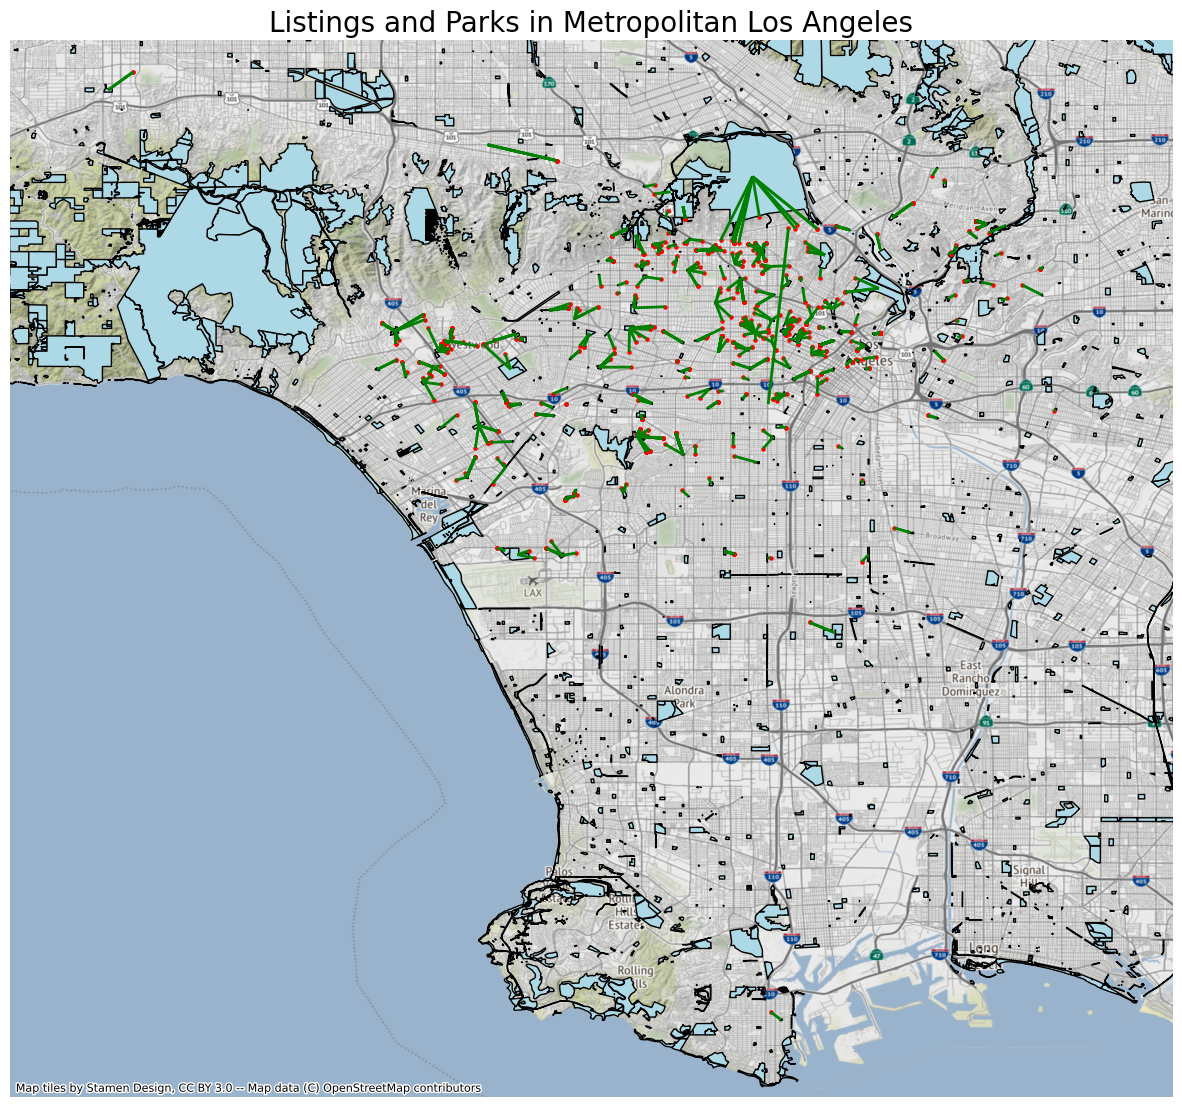

In [189]:
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 15))

# Plot the polygons
parks.plot(ax=ax, color='lightblue', edgecolor='black', legend=True)

# Plot the points
parktrue.plot(ax=ax, color='red', markersize=5, legend=True)

# Plot the lines
line_gdf.plot(ax=ax, color='green', linewidth=2, legend=True)

# Set the title and axis labels
ax.set_title('Listings and Parks in Metropolitan Los Angeles', fontsize = 20)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ctx.add_basemap(ax, zoom=12, url=ctx.providers.CartoDB.Voyager, crs=4326)
ax.set_xlim(-118.65, -118.1)
ax.set_ylim(33.7, 34.2)
ax.set_axis_off()
# Show the plot
plt.show()


Beyond the visual relationship between the listings and parks, we plot a histogram to see how apartments are clustered spatially in relation to parks. We see the largest number of listings between 200 and 400 meters from parks, declining progressively every two hundred meters. Interestingly, the closer distance of less than 200 meters has fewer listings than those between 200 and 600 meters. 

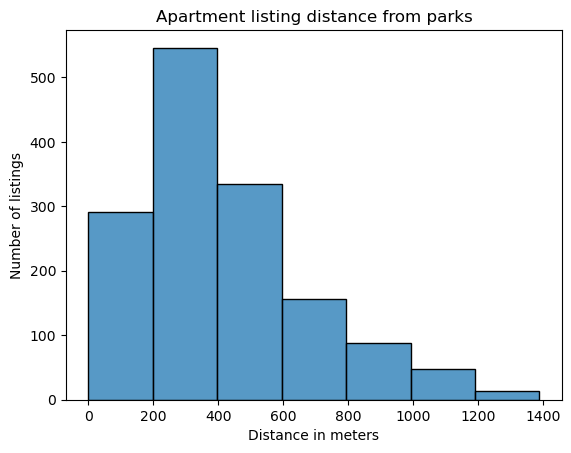

In [190]:
import seaborn as sns
ax = sns.histplot(data=join, x="distance", bins=7)

ax.set(xlabel='Distance in meters',
       ylabel='Number of listings',
       title='Apartment listing distance from parks')

#display barplot
plt.show()

This analysis suffers does suffer from limitations. Because our distance category is based off nearest parks, this does not actually account for different parks that may be listed in the listings than those it is connected with through the sjoin.nearest command. Given more time, we could normalize the language between the datasets and connect them based off of mention. Those listings that only mention parks more broadly could be connected with the nearest parks. 

Additionally, we were unable to connect listing point data to the edge of park polygons, using polygon centroids instead. This has the effect of increasing distances, negligibly with smaller parks but significantly with larger parks. 


When running a regression between price and distance there does not seem to be much of a relationship, besides a slight negative relationship. Controlling for bedroom size by dividing rental price by number of bedrooms similarly does not show much of a relationship between price and distance to parks. Our data is limited and has its limitations, making extrapolation difficult. Further research should be conducted on a fuller dataset that also incorporates other sources and accounts for listings that do not list parks but are near them nonetheless. 

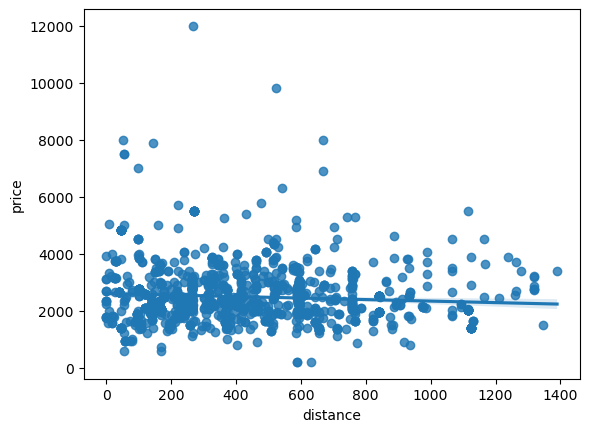

In [191]:
ax = sns.regplot(x="distance", y="price", data=join)

In [192]:
import numpy as np
join['price_control'] = np.where(join['bedrooms'] == 0, join['price'] / 1, 
                                            join['price'] / join['bedrooms'])

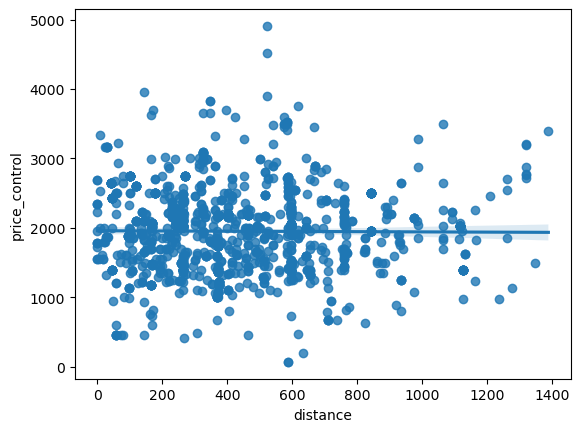

In [193]:
ax = sns.regplot(x="distance", y="price_control", data=join)

Here we can see, as the histogram displayed, that the mean and median of listings are clustered roughly a quarter mile from parks. 

In [194]:
join['distance'].mean()

428.8662919937723

In [195]:
join['distance'].median()

372.4081001084998

In [196]:
join.to_pickle("./parkdistance.pkl")